<a href="https://colab.research.google.com/github/Gayatrii01/Assignments/blob/master/CNN__Assignment_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONVOLUTIONAL NEURAL NETWORK (CNN) ASSIGNMENT

### Name of dataset: The CIFAR-10

### Source of dataset: https://www.cs.toronto.edu/~kriz/cifar.html

### About The CIFAR-10 dataset:

- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

- The dataset is divided into five training batches and one test batch, each with 10000 images.

- The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

##### There are 10 Categories : 10 Objects / classes : airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

In [1]:
# Import TensorFlow and necessary modules for building neural network models,
# along with matplotlib for visualization and numpy for numerical computations
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset:

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


## Explanation:

 This line of code is used to load the CIFAR-10 dataset for image classification
(alos used for machine learning or deep learning tasks).

- datasets.cifar10.load_data(): This function loads the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

(X_train, y_train), (X_test, y_test): This line of code uses tuple unpacking to assign the returned data from load_data() to four variables:

1. X_train: Contains the training images. These are the images that the model will learn from.
2. y_train: Contains the corresponding labels for the training images. Each label represents the class/category of the corresponding image in X_train.
3. X_test: Contains the test images. These are images that the model will be evaluated on after training to assess its performance on unseen data.
4. y_test: Contains the corresponding labels for the test images. Each label represents the class/category of the corresponding image in X_test.

In [3]:
X_train.shape

(50000, 32, 32, 3)

## Explanation:


X_train.shape is used to check the shape of the training data.
This is helpful to understand the dimensions of the training data, especially when working with images in machine learning or deep learning tasks.

Output: (50000, 32, 32, 3)
Explanation:
- The first dimension (50000) represents the number of samples or images in the training data.
- The second dimension (32) represents the height of each image in pixels.
- The third dimension (32) represents the width of each image in pixels.
- The fourth dimension (3) represents the number of color channels in each image (RGB: Red, Green, Blue).






In [4]:
X_test.shape

(10000, 32, 32, 3)

## Explanation:

Test samples are 10000, each sample are 32 x 32 image/dimension and have 3 channels RGB (Red, Green, Blue).

X_test.shape is used to check the shape of the test data.
Similar to X_train.shape, it helps in understanding the dimensions of the test data, particularly when working with image data in machine learning or deep learning tasks.

Output:- (10000, 32, 32, 3)
Explanation:
- The first dimension (10000) represents the number of samples or images in the test data.
- The second dimension (32) represents the height of each image in pixels.
- The third dimension (32) represents the width of each image in pixels.
- The fourth dimension (3) represents the number of color channels in each image (RGB: Red, Green, Blue).






# Check each training sample:

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
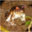

In [5]:
X_train[0]

## Explanation:

X_train[0] is used to access the first image in the training data.

This is useful for inspecting individual images, understanding their structure, and potentially performing preprocessing or visualization.

Output:

An array representing the pixel values of the first training image. This array will have a shape of (32, 32, 3), representing a 32x32 image with 3 color channels (RGB).

In [6]:
 y_train.shape

(50000, 1)

## Explanation:
y_train.shape is used to check the shape of the labels associated with the training data.

It helps in understanding the dimensions of the label data, particularly when working with classification tasks.

Output:- (50000, 1)

Explanation:
- The first dimension (50000) represents the number of samples or images in the training data.
- The second dimension (1) represents the single label associated with each image.

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## Explanation:

y_train[:5] is used to access the first five labels in the training data.

This allows you to inspect a subset of the labels, providing insights into the distribution of classes or verifying data integrity.

Output:
An array containing the first five labels associated with the training images.

(What output will come, numeric labels (e.g., 0, 1, 2) or categorical labels (e.g., "cat", "dog", "bird") its all totally depend on the dataset and its encoding.)

In [8]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

## Explanation:

The line "y_train = y_train.reshape(-1, )" is used to reshape the labels associated with the training data.


In this case, it's reshaping the labels into a one-dimensional array.


This is often done to ensure compatibility with certain machine learning algorithms or frameworks that expect labels to be in a specific shape.


Output:  An array containing the first five reshaped labels associated with the training images.


(Note: After reshaping, the shape of y_train will be (50000,) if the original shape was (50000, 1)).

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [10]:
classes[4]

'deer'

## Explanation:

The line of code defines a Python list named 'classes'. Each element of this list represents a category or class label for the CIFAR-10 dataset. The CIFAR-10 dataset consists of images belonging to ten different classes:

# Plot some images to see what they are:

In [11]:
def plot_sample(X,y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

## Explanation:

The function "plot_sample" is designed to visualize a single sample from a dataset along with its corresponding label.

It takes three parameters:
- X: The dataset containing the samples/images.
- y: The labels associated with the samples/images.
- index: The index of the sample/image to be plotted.


This function aims to provide a convenient way to visually inspect individual samples and their associated labels.


Example usage:
sample(X_train, y_train, 0)
This will plot the first sample/image from the training dataset along with its corresponding label.

The function first creates a figure with a specified size (15 inches wide and 2 inches tall) to ensure the image is displayed clearly.
It then uses matplotlib's imshow function to display the image corresponding to the given index.
The xlabel is set using the classes list, which maps the numeric label to its corresponding class name.
This helps in interpreting the label associated with the plotted image.

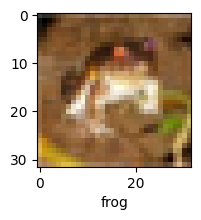

In [12]:
plot_sample(X_train, y_train, 0)

## Explanation:

This line of code is a function call to plot_sample, which is a custom function designed for visualizing individual samples and their associated labels.


Arguments:
- X_train: The training dataset containing the images.
- y_train: The labels associated with the training dataset.
- 0: The index of the sample/image to be plotted, in this case, the first sample.


The function call plot_sample(X_train, y_train, 0) displayed the first image from the training dataset along with its corresponding label.


This visualization provides a quick way to inspect individual samples and their associated labels, aiding in understanding the data and verifying correctness.

(Note: Depending on the implementation of the plot_sample function, the appearance and formatting of the visualization may vary.)






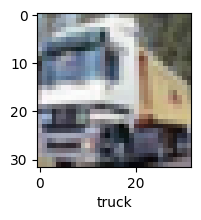

In [13]:
plot_sample(X_train, y_train, 1)

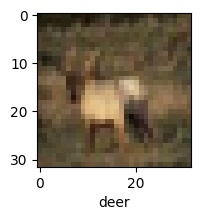

In [14]:
plot_sample(X_train, y_train, 3)

## Normalizing the training data

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [15]:
X_train = X_train / 255
X_test = X_test / 255

## Build simple artificial neural network for image classification

In [17]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 145s 92ms/step - loss: 1.8140 - accuracy: 0.3574
Epoch 2/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.6225 - accuracy: 0.4287
Epoch 3/5
1563/1563 [==============================] - 149s 96ms/step - loss: 1.5404 - accuracy: 0.4543
Epoch 4/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4834 - accuracy: 0.4759
Epoch 5/5
1563/1563 [==============================] - 137s 87ms/step - loss: 1.4328 - accuracy: 0.4966


## Explanation:

This code defines and trains a simple Artificial Neural Network (ANN) using the Sequential API provided by TensorFlow/Keras.

Model Architecture:
- The model is defined using the Sequential class, which allows you to create models layer by layer.
- It starts with a Flatten layer, which transforms the 32x32x3 input images into a one-dimensional array.
- Following the Flatten layer, there are three Dense layers with 3000, 1000, and 10 units, respectively.
- Each Dense layer uses the ReLU activation function, except for the last layer, which uses the softmax activation function since it's a multi-class classification problem.

### Compilation:
- The model is compiled using the stochastic gradient descent (SGD) optimizer.
- The loss function used is sparse_categorical_crossentropy, suitable for multi-class classification tasks where the labels are integers.
- The metrics to monitor during training are set to accuracy.

### Training:
- The model is trained using the fit method.
- Training data (X_train and y_train) is passed to the fit method along with the number of epochs (5 in this case), indicating the number of times the entire training dataset will be passed forward and backward through the network.

### Example:
ann.fit(X_train, y_train, epochs=5)

(Note: The success and effectiveness of the model depend on various factors such as the complexity of the problem, the size and quality of the dataset, and the chosen hyperparameters.)

In [18]:
# Evaluate the model
test_loss, test_accuracy = ann.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

313/313 [==============================] - 9s 28ms/step - loss: 1.5359 - accuracy: 0.4575
Test Accuracy: 45.75%


## Explanation:
This code evaluates the trained Artificial Neural Network (ANN) model on the test dataset to assess its performance.

### Evaluation:
- The evaluate method of the ANN model is used to evaluate its performance on the test dataset.
- The test data (X_test and y_test) are passed to the evaluate method.- The method returns two values: test_loss and test_accuracy.
- test_loss represents the loss value calculated during the evaluation.
- test_accuracy represents the accuracy of the model on the test dataset.
- These values are then assigned to the variables test_loss and test_accuracy.

### Example:
test_loss, test_accuracy = ann.evaluate(X_test, y_test)

### Printing Results:
- The test accuracy is printed to the console.
- The test accuracy is multiplied by 100 to convert it to a percentage format and displayed with two decimal places.

### Example:
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

(Note: Evaluating the model on a separate test dataset provides insights into its generalization performance and helps assess its effectiveness in making predictions on unseen data.)






In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 24ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.54      0.54      1000
           1       0.38      0.85      0.52      1000
           2       0.52      0.19      0.27      1000
           3       0.44      0.18      0.25      1000
           4       0.37      0.43      0.40      1000
           5       0.49      0.22      0.30      1000
           6       0.56      0.47      0.51      1000
           7       0.38      0.71      0.49      1000
           8       0.61      0.60      0.60      1000
           9       0.56      0.40      0.47      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.44     10000
weighted avg       0.49      0.46      0.44     10000



## Explanation:
 This code imports necessary modules and computes a classification report to evaluate the performance of the trained model on the test dataset.

### Importing Modules:
- The code imports confusion_matrix and classification_report from sklearn.metrics.
- confusion_matrix is used to compute the confusion matrix, which provides insights into the performance of the classification model.
- classification_report generates a detailed classification report, including precision, recall, F1-score, and support for each class.

### Example:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

### Prediction:
- The trained ANN model (ann) is used to predict the class labels for the test dataset (X_test).
- The predictions are stored in the variable y_pred.

### Example:
y_pred = ann.predict(X_test)

### Post-processing:
- Since the predictions are in the form of probability distributions, np.argmax is used to obtain the class label with the highest probability for each prediction.
- The obtained class labels are stored in the variable y_pred_classes.

### Example:
y_pred_classes = [np.argmax(element) for element in y_pred]

### Classification Report:
- The classification_report function is called to generate a detailed classification report.
- It takes the true labels (y_test) and predicted labels (y_pred_classes) as inputs.
- The classification report includes metrics such as precision, recall, F1-score, and support for each class.

### Example:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

(Note: The classification report provides valuable insights into the performance of the model, including its ability to correctly classify each class, precision, recall, and other important metrics.)






Build a convolutional neural network to train our images

In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Explanation:
This code defines a Convolutional Neural Network (CNN) using the Sequential API provided by TensorFlow/Keras.

### Model Architecture:
- The model starts with a Conv2D layer with 32 filters, each with a kernel size of (3, 3) and ReLU activation function.
- This is followed by a MaxPooling2D layer with a pool size of (2, 2), which reduces the spatial dimensions of the feature maps.
- Next, another Conv2D layer with 64 filters and kernel size (3, 3) is added, followed by another MaxPooling2D layer.
- The output from the convolutional layers is flattened into a one-dimensional array.
- Then, two Dense layers are added with 64 and 10 units, respectively, with ReLU activation for the first dense layer and softmax activation for the last dense layer.

### Explanation of layers:
- Conv2D: Convolutional layer that applies a specified number of filters to the input data, extracting features through convolutions.
- MaxPooling2D: Pooling layer that reduces the spatial dimensions of the input data by taking the maximum value within each window.
- Flatten: Layer that flattens the input data into a one-dimensional array, preparing it for the fully connected layers.
- Dense: Fully connected layer that connects every neuron from the previous layer to the current layer.

(Note: CNNs are particularly effective for image classification tasks as they can learn spatial hierarchies of features.)







In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Explanation:
 This code compiles the Convolutional Neural Network (CNN) model defined earlier using the Sequential API.

### Compilation:
- The compile method configures the model for training.
- Various parameters are specified during compilation, including the optimizer, loss function, and metrics to monitor during training.

### Explanation of Parameters:
- optimizer: The optimizer algorithm used to update the weights of the neural network during training. Here, 'adam' optimizer is used, which is a popular choice known for its efficiency and adaptability.
- loss: The loss function used to compute the difference between the model's predictions and the true labels. 'sparse_categorical_crossentropy' is used since the labels are integers.
- metrics: The metrics to monitor during training. Here, 'accuracy' is used to evaluate the performance of the model based on the percentage of correctly classified instances.

(Note: Choosing appropriate optimization algorithm, loss function, and metrics is crucial for the success of the training process and the performance of the model.)

In [22]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4729 - accuracy: 0.4693
Epoch 2/5
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1188 - accuracy: 0.6070
Epoch 3/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9904 - accuracy: 0.6541
Epoch 4/5
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9100 - accuracy: 0.6854
Epoch 5/5
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8470 - accuracy: 0.7056


## Explanation:
This code trains the compiled Convolutional Neural Network (CNN) model on the training dataset.

### Training:
- The fit method of the CNN model is called to train the model.
- Training data (X_train and y_train) are passed to the fit method.
- The number of epochs (5 in this case) specifies the number of complete passes through the entire training dataset during the training process.

(Note: Training the model involves updating the model's weights iteratively to minimize the loss function, thereby improving its ability to make accurate predictions.)





In [23]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7946 - accuracy: 0.7251
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7503 - accuracy: 0.7391
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7142 - accuracy: 0.7527
Epoch 4/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.6748 - accuracy: 0.7660
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6418 - accuracy: 0.7776
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6164 - accuracy: 0.7852
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.5893 - accuracy: 0.7928
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5571 - accuracy: 0.8054
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.5319 - accuracy: 0.8131
Epoch 10/10
1563/1563 [==============================] - 56s 36m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [24]:
# Evaluate the model
cnn.evaluate(X_test, y_test)
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
formatted_accuracy = "{:.2f}%".format(test_accuracy * 100)
print("Test Accuracy:", formatted_accuracy)

313/313 [==============================] - 3s 11ms/step - loss: 0.9680 - accuracy: 0.7022
Test Accuracy: 70.22%


# Explanation:
This code snippet evaluates a trained Convolutional Neural Network (CNN) model on a test dataset and prints the test accuracy.

### Evaluation:
- The CNN model (cnn) is evaluated on the test dataset (X_test, y_test) using the evaluate method.
- However, the evaluation result is not stored or used.

### Retrieving Evaluation Results:
- The evaluate method is called again, this time storing the evaluation results in variables test_loss and test_accuracy.
- test_loss represents the loss value calculated during the evaluation.
- test_accuracy represents the accuracy of the model on the test dataset.

### Formatting Accuracy:
- The test_accuracy is multiplied by 100 to convert it to a percentage format.
- The formatted_accuracy variable is created to store the test accuracy in a formatted string with two decimal places.

### Printing Test Accuracy:
- The formatted test accuracy is printed to the console using the print function.
- The output message "Test Accuracy:" is displayed along with the formatted_accuracy.

(Note: Storing the evaluation results allows for further analysis or use of the metrics obtained during evaluation.)



In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[9.2880182e-05, 4.9681886e-04, 2.7167716e-04, 7.8412968e-01,
        5.9846551e-03, 1.7979312e-01, 1.3838488e-02, 1.4140882e-05,
        1.5209287e-02, 1.6924976e-04],
       [8.6599808e-05, 7.0243115e-03, 4.4062736e-09, 2.7478320e-08,
        1.6008065e-09, 3.7601055e-12, 3.4460536e-12, 6.9479943e-12,
        9.9286515e-01, 2.3911212e-05],
       [1.0284712e-01, 7.9792306e-02, 1.4548904e-03, 5.8724720e-04,
        3.3541583e-03, 2.4120824e-05, 3.3361321e-05, 3.5345607e-04,
        7.7900261e-01, 3.2550585e-02],
       [9.0164936e-01, 6.9913894e-02, 4.0506907e-03, 1.0996254e-03,
        4.0924613e-04, 1.9590673e-04, 2.2280308e-04, 6.4681284e-05,
        2.1534067e-02, 8.5979176e-04],
       [1.0726584e-07, 2.4306763e-07, 2.4501821e-03, 2.0656396e-02,
        9.4423181e-01, 8.4707123e-04, 3.1812984e-02, 4.3000102e-07,
        6.1877233e-07, 1.8235010e-08]], dtype=float32)

#Explanation:
This code snippet predicts the class labels for the test dataset using a trained Convolutional Neural Network (CNN) model and prints the predictions for the first five samples.

### Prediction:
- The cnn.predict method is called to predict the class labels for the test dataset X_test.
- The predictions are stored in the y_pred variable.

### Accessing Predictions:
- The y_pred[:5] expression is used to access the predictions for the first five samples.
- This provides a quick glimpse into the model's predictions for a subset of the test dataset.

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

# Explanation:
This code snippet converts the predicted probabilities generated by a Convolutional Neural Network (CNN) model into class labels and prints the converted labels for the first five samples.

### Conversion to Class Labels:
- The list comprehension [np.argmax(element) for element in y_pred] is used to convert each predicted probability distribution (element) into a class label.
- The np.argmax function returns the index of the maximum value in the probability distribution, effectively selecting the class with the highest probability.
- This process is applied to each predicted probability distribution in y_pred, resulting in a list of class labels.

Accessing Converted Labels:
- The y_classes[:5] expression is used to access the converted class labels for the first five samples.
- This provides a quick glimpse into the model's predicted class labels for a subset of the test dataset.

In [27]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

# Explanation:
This code snippet prints the true class labels for the first five samples in the test dataset.

### Accessing True Class Labels:
- The expression y_test[:5] is used to access the true class labels for the first five samples in the test dataset.
- This provides a quick glimpse into the actual labels of a subset of the test dataset.


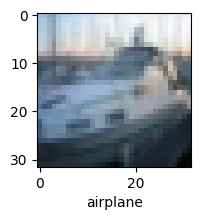

In [28]:
plot_sample(X_test, y_test.argmax(axis=1), 2)

In [29]:
classes[y_classes[2]]

'ship'

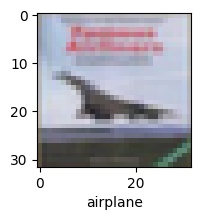

In [30]:
plot_sample(X_test, y_test.argmax(axis=1), 3)

In [ ]:
classes[y_classes[3]]

'airplane'